In [1]:
%pylab inline
import matplotlib.pyplot as plt
import seaborn

import os
import numpy as np
import h5py


Populating the interactive namespace from numpy and matplotlib


In [9]:
savedirs = {
    #'LogisticNormal_fp_cw256_akl100': '../output/005_LN_fp_aKL-mnist/VAE_lr5_00e-04_qh300_ph200_ds50_pl4_pzl0_ql4_zl2_al2_hzl0_maxout_adam_bs100_idrp0_25_lbdrp0_hxdrp0_l2_rv0_10___gn2_50_aKLz50000_aKLa50000_aCW1_00_abd1_BN_LogisticNormal_fp-6_0_sBNs_b0-0_20_fb0_20_aBP1_00_sh1_00_cw256_00_bxy1_00_mbw0_mbwxy0_kllg1_00-uid/seed-1',
    #'Dirichlet_beta_annealed_negKL': '../output/004_Dirichlet_anneal_beta-mnist/VAE_lr5_00e-04_qh300_ph200_ds50_pl4_pzl0_ql4_zl2_al2_hzl0_maxout_adam_bs100_idrp0_25_lbdrp0_hxdrp0_l2_rv0_10___gn2_50_aKL1_00_aCW50000_nKL_BN_sBNs_b0-0_20_fb5_00e-03_aBP50000_00_sh1_00_cw128_00_mbw0_mbwxy0_kllg1_00-uid/seed-1',
    #'approxM2': '../output/003_collectstats_approxM2-mnist/VAE_lr-5_00e-04_qh-300_ph-200_ds-50_pl-4_pzl-0_ql-4_zl-2_al-2_hzl-0_nl-maxout_opt-adam_bs-100_ep-300_idrp-0_25_lbdrp-0_00e+00_reg-l2_rv-0_10_rspec-__gn-2_50_aKL-1_00_aCW-50000_BN_mod-approxM2_sBNs_b0-0_20_sh-1_00_tp_cw-128_00_kllg-1_00-uid/seed-1',
    'exactM2': '../output/006_M2/VAE_lr5_00e-04_qh300_ph200_ds50_pl4_pzl0_ql4_zl2_al2_hzl0_maxout_adam_bs100_idrp0_25_lbdrp0_hxdrp0_l2_rv0_10___gn2_50_aKLz1_aKLa1_aCW50000_00_abd1_BN_exactM2_sBNs_b0-0_20_fb0_20_aBP1_00_sh1_00_cw128_00_bxy1_00_mbw0_mbwxy0_kllg1_00_ns1-uid/seed-1',

    'GumbelSoftmaxM2_shp1e0_cw128': '../output/006_GumbelSoftmaxM2/VAE_lr5_00e-04_qh300_ph200_ds50_pl4_pzl0_ql4_zl2_al2_hzl0_maxout_adam_bs100_idrp0_25_lbdrp0_hxdrp0_l2_rv0_10___gn2_50_aKLz1_aKLa1_aCW50000_00_abd1_BN_GumbelSoftmaxM2_sBNs_b0-0_20_fb0_20_aBP1_00_sh1_00_cw128_00_bxy1_00_mbw0_mbwxy0_kllg1_00_ns1-uid/seed-1',
    #'GumbelSoftmaxM2_shp1e1_cw128': '../output/006_GumbelSoftmaxM2/VAE_lr5_00e-04_qh300_ph200_ds50_pl4_pzl0_ql4_zl2_al2_hzl0_maxout_adam_bs100_idrp0_25_lbdrp0_hxdrp0_l2_rv0_10___gn2_50_aKLz1_aKLa1_aCW50000_00_abd1_BN_GumbelSoftmaxM2_sBNs_b0-0_20_fb0_20_aBP1_00_sh10_00_cw128_00_bxy1_00_mbw0_mbwxy0_kllg1_00_ns1-uid/seed-1',
    #'GumbelSoftmaxM2_shp5e-1_cw128': '../output/006_GumbelSoftmaxM2/VAE_lr5_00e-04_qh300_ph200_ds50_pl4_pzl0_ql4_zl2_al2_hzl0_maxout_adam_bs100_idrp0_25_lbdrp0_hxdrp0_l2_rv0_10___gn2_50_aKLz1_aKLa1_aCW50000_00_abd1_BN_GumbelSoftmaxM2_sBNs_b0-0_20_fb0_20_aBP1_00_sh0_50_cw128_00_bxy1_00_mbw0_mbwxy0_kllg1_00_ns1-uid/seed-1',
    #'STGumbelSoftmaxM2_shp1e0_cw128':'../output/006_STGumbelSoftmaxM2/VAE_lr5_00e-04_qh300_ph200_ds50_pl4_pzl0_ql4_zl2_al2_hzl0_maxout_adam_bs100_idrp0_25_lbdrp0_hxdrp0_l2_rv0_10___gn2_50_aKLz1_aKLa1_aCW50000_00_abd1_BN_STGumbelSoftmaxM2_sBNs_b0-0_20_fb0_20_aBP1_00_sh1_00_cw128_00_bxy1_00_mbw0_mbwxy0_kllg1_00_ns1-uid/seed-1/',
    #'006_M2_exact_cw128':'../output/006_M2/VAE_lr5_00e-04_qh300_ph200_ds50_pl4_pzl0_ql4_zl2_al2_hzl0_maxout_adam_bs100_idrp0_25_lbdrp0_hxdrp0_l2_rv0_10___gn2_50_aKLz1_aKLa1_aCW50000_00_abd1_BN_exactM2_sBNs_b0-0_20_fb0_20_aBP1_00_sh1_00_cw128_00_bxy1_00_mbw0_mbwxy0_kllg1_00_ns1-uid/seed-1'

}


In [10]:
for k,v in sorted(savedirs.iteritems()):
    print k, os.listdir(v)

GumbelSoftmaxM2_shp1e0_cw128 ['EP150-stats.h5', 'final.h5', 'config.pkl', 'EP300-stats.h5', 'EP0-stats.h5', 'samples.h5']
exactM2 ['EP150-stats.h5', 'final.h5', 'config.pkl', 'EP300-stats.h5', 'EP0-stats.h5', 'samples.h5']


In [11]:
filenames = ['final.h5','EP400-stats.h5','EP350-stats.h5','EP200-stats.h5','EP150-stats.h5','EP100-stats.h5']
def findfile(savedir,filenames):
    for f in filenames:
        path = os.path.join(savedir,f)
        if os.path.exists(path):
            return path
filepaths = {k:findfile(savedir,filenames) for k,savedir in savedirs.iteritems()}
#filepaths

In [12]:
def loadDataHDF5(data):
    if isinstance(data,h5py.File) or isinstance(data,h5py.Group):
        return {k:loadDataHDF5(v) for k,v in data.iteritems()}
    elif isinstance(data,h5py.Dataset):
        return data.value
    else:
        print 'unhandled datatype: %s' % type(data)

def loadHDF5(filepath):
    with h5py.File(filepath,'r') as f:
        return loadDataHDF5(f)

In [13]:
results = {k:loadHDF5(filepath) for k,filepath in filepaths.iteritems()}
for k in results.keys():
    print k
    print results[k].keys()
    for kk in results[k].keys():
        pass
        #print results[k][kk].keys()

GumbelSoftmaxM2_shp1e0_cw128
[u'test', u'train', u'params', u'valid', u'time']
exactM2
[u'test', u'train', u'params', u'valid', u'time']


In [16]:
def plotExperiment(results,
                   title = '',
                   keys = ['cost','bound','accuracy'],
                   funcs = [min,min,max],
                   yscales = ['linear','linear','linear'],
                   ylims = [(100,600),(100,600),(0,1)],
                   locs = ['upper right','upper right','lower right'],
                   label_prefix=None
                   ):
    plt.figure(1,figsize=(18,4))
    for i,(key,f,yscale,ylim,loc) in enumerate(zip(keys,funcs,yscales,ylims,locs)):
        #print i,key
        plt.subplot(1,3,i+1)
        if label_prefix == None:
            label = 'best %s = %0.2f' % (key,f(results[key]))
        else:
            label='%s: best %s = %0.2f' % (label_prefix,key,f(results[key]))
        plt.plot(results['epochs'],results[key],label=label)
        plt.legend(loc=loc)
        plt.yscale(yscale)
        plt.title('%s %s' % (title,key))
        if ylim is not None:
            plt.ylim(ylim)

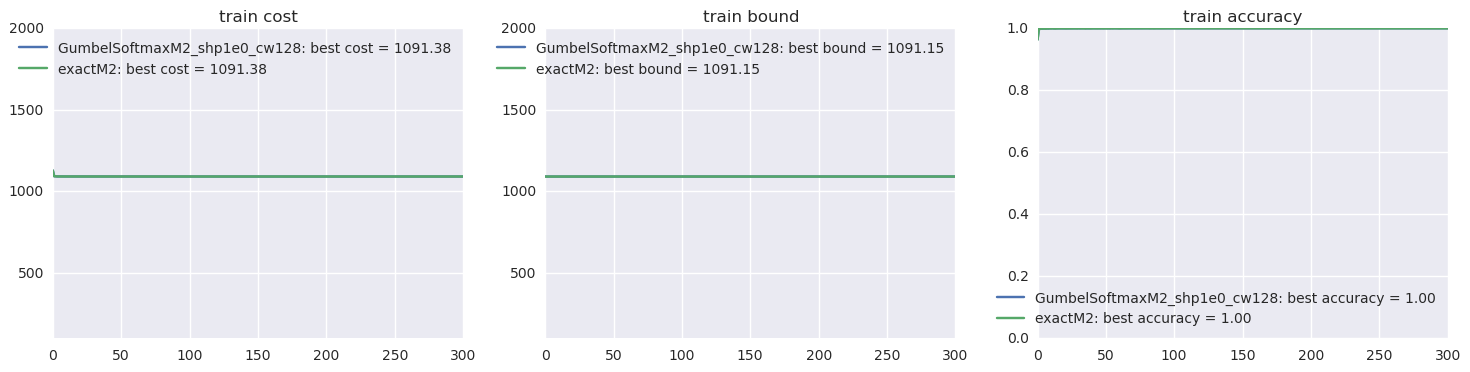

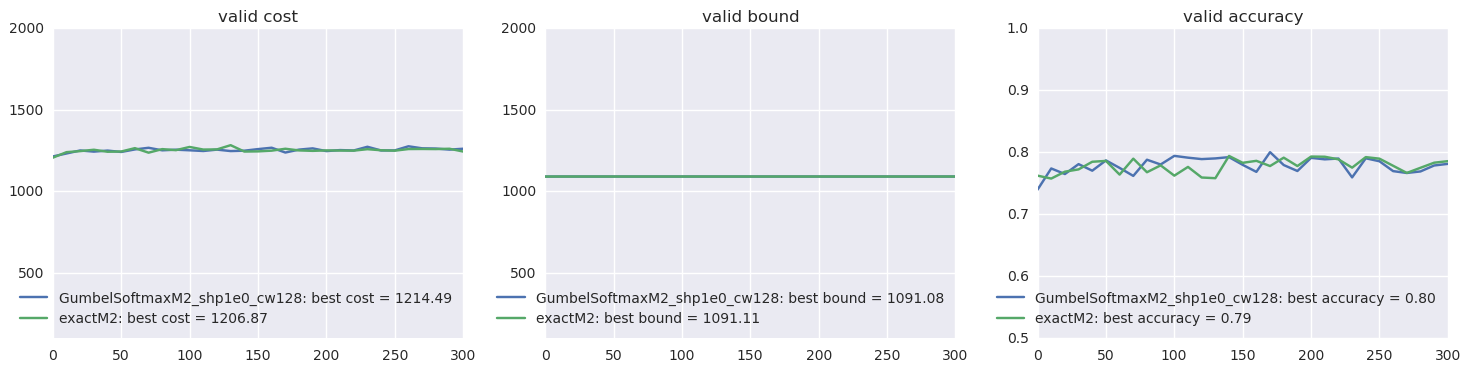

In [18]:
for k,r in results.iteritems():
    plotExperiment(r['train'],'train',label_prefix=k)
plt.show()
for k,r in results.iteritems():
    plotExperiment(r['valid'],'valid',label_prefix=k,locs = ['lower right','lower right','lower right'],
                   ylims = [(100,2000),(100,2000),(0.5,1)])
plt.show()

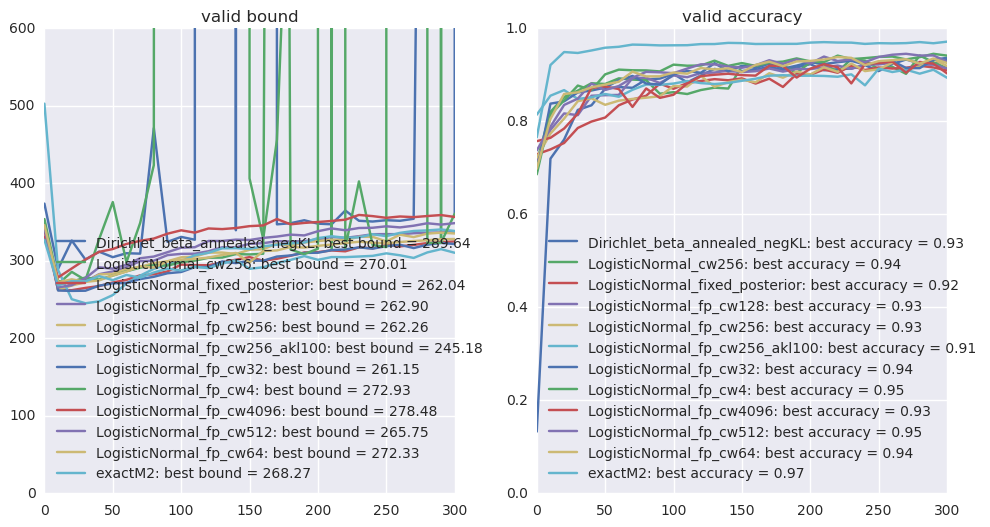

In [127]:
myfilter = ['exactM2','Dirichlet_beta_annealed_negKL','LogisticNormal_cw256']#,'LogisticNormal_fixed_posterior']
myfilter += ['LogisticNormal_c=%s' % c for c in ['-06','00','06','50'] ]
plt.figure(1,figsize=(18,6))
plt.subplot(1,2,1)
for k,r in sorted(results.iteritems()):
    #if k in myfilter:
    if True:
        plotExperiment(r['valid'],'valid',
                       label_prefix=k,
                       keys=['bound','accuracy'],
                       funcs=[min,max],
                       ylims=[(0,600),(0,1)],
                       locs=['lower left','lower left'])

#plt.subplot(1,2,2)
#for k,r in sorted(results.iteritems()):
#    if k in myfilter:
#        plotExperiment(r['valid'],'valid',label_prefix=k,keys=['accuracy'],funcs=[max],ylims=[(0,1)],locs=['lower right'])
#plt.show()

In [131]:
results['exactM2']['valid']['accuracy']

array([[ 0.7653],
       [ 0.9209],
       [ 0.9489],
       [ 0.9469],
       [ 0.9523],
       [ 0.9582],
       [ 0.9602],
       [ 0.9649],
       [ 0.9643],
       [ 0.9632],
       [ 0.9634],
       [ 0.9636],
       [ 0.966 ],
       [ 0.9661],
       [ 0.9686],
       [ 0.9681],
       [ 0.9662],
       [ 0.9664],
       [ 0.9665],
       [ 0.9665],
       [ 0.9692],
       [ 0.9702],
       [ 0.9693],
       [ 0.9691],
       [ 0.9664],
       [ 0.968 ],
       [ 0.9675],
       [ 0.9681],
       [ 0.9703],
       [ 0.9678],
       [ 0.9712]])

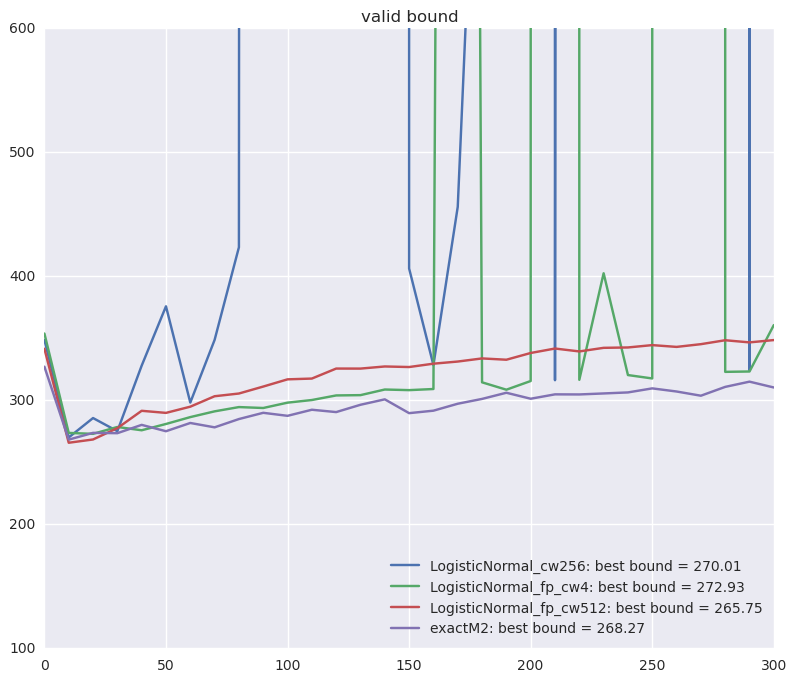

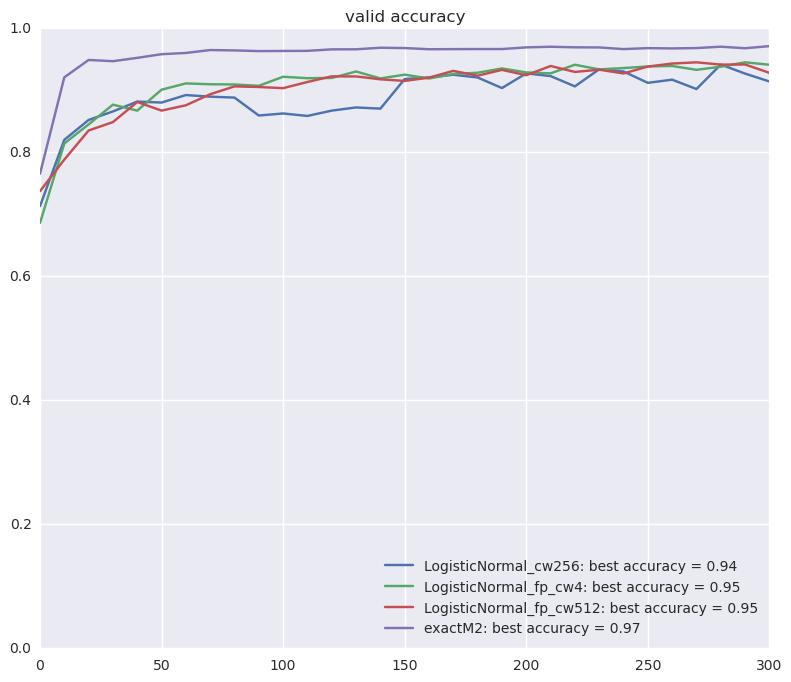

In [12]:
myfilter = ['exactM2','LogisticNormal_fp_cw512','LogisticNormal_fp_cw4','LogisticNormal_cw256']
plt.figure(1,figsize=(32,8))
for k,r in sorted(results.iteritems()):
    if 'bxy' in k or k in myfilter:
        plotExperiment(r['valid'],'valid',label_prefix=k,keys=['bound'],funcs=[min],ylims=[(100,600)],locs=['lower right'])
plt.show()
plt.figure(1,figsize=(32,8))
for k,r in sorted(results.iteritems()):
    if 'bxy' in k or k in myfilter:
        plotExperiment(r['valid'],'valid',label_prefix=k,keys=['accuracy'],funcs=[max],ylims=[(0,1)],locs=['lower right'])
plt.show()

In [31]:
def reshape(x,batch_size=100):
    y = []
    n = len(x)/batch_size
    for i in range(n):
        y.append(x[batch_size*i:batch_size*(i+1)].reshape(1,batch_size,-1))
    y = np.vstack(y)
    return y

def plotPercentiles(x=None,y=None,color='b',alpha=0.2,label=None,linewidth=1.):
    if y==None:
        xvals = None
        yvals = x
    else:
        xvals = x
        yvals = y
    p05_norm = np.percentile(yvals,5,axis=1)
    p10_norm = np.percentile(yvals,10,axis=1)
    p25_norm = np.percentile(yvals,25,axis=1)
    p50_norm = np.percentile(yvals,50,axis=1)
    p75_norm = np.percentile(yvals,75,axis=1)
    p90_norm = np.percentile(yvals,90,axis=1)
    p95_norm = np.percentile(yvals,95,axis=1)
    
    if xvals is None:
        xvals = np.arange(len(p50_norm))

    plt.plot(xvals,p50_norm,color=color,label=label,linewidth=linewidth)
    #plt.fill_between(xvals,p05_norm,p95_norm,color=color,alpha=alpha)
    plt.fill_between(xvals,p10_norm,p90_norm,color=color,alpha=alpha)
    plt.fill_between(xvals,p25_norm,p75_norm,color=color,alpha=alpha)


In [32]:
modelkey = 'GumbelSoftmaxM2_shp1e0_cw128'
print results[modelkey].keys()
train = results[modelkey]['train']
valid = results[modelkey]['valid']
#params = results[modelkey]['params']

[u'test', u'train', u'params', u'valid', u'time']


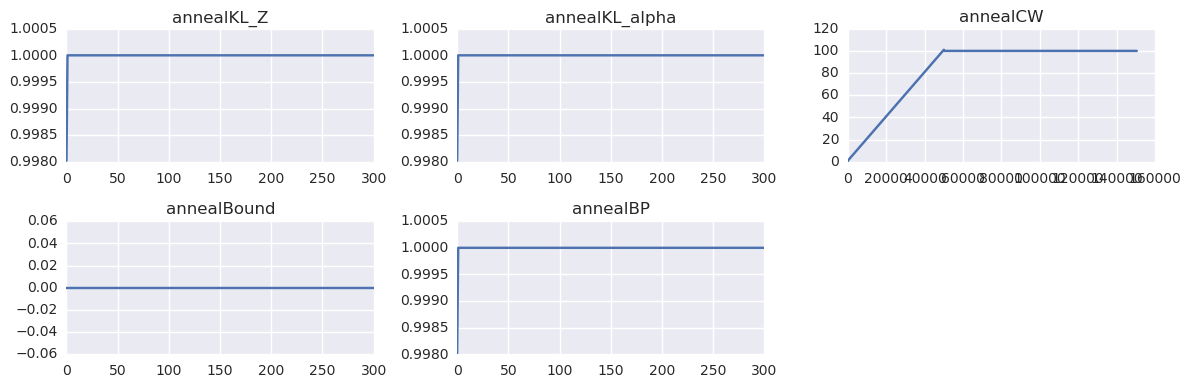

In [69]:
plt.figure(1,figsize=(12,4))
plt.subplot(2,3,1)
plt.plot(train['annealKL_Z']*100,label='annealKL')
plt.title('annealKL_Z')
plt.subplot(2,3,2)
key = 'annealKL_alpha'
plt.plot(train[key]*100,label=key)
plt.title(key)
plt.subplot(2,3,3)
plt.plot(train['annealCW']*100,label='annealCW')
plt.title('annealCW')
plt.subplot(2,3,4)
key = 'annealBound'
plt.plot(train[key]*100,label=key)
plt.title(key)
plt.subplot(2,3,5)
key = 'annealBP'
plt.plot(train[key]*100,label=key)
plt.title(key)
plt.tight_layout()

In [66]:
sorted(train.keys())

[u'KL_L',
 u'KL_U',
 u'KL_Y_U',
 u'KL_Z_L',
 u'KL_Z_U',
 u'L-q_Z_0_BN_running_mean',
 u'L-q_Z_0_BN_running_var',
 u'L-q_Z_1_BN_running_mean',
 u'L-q_Z_1_BN_running_var',
 u'L-q_h(x)_0_BN_running_mean',
 u'L-q_h(x)_0_BN_running_var',
 u'L-q_h(x)_1_BN_running_mean',
 u'L-q_h(x)_1_BN_running_var',
 u'L-q_h(x)_2_BN_running_mean',
 u'L-q_h(x)_2_BN_running_var',
 u'L-q_h(x)_3_BN_running_mean',
 u'L-q_h(x)_3_BN_running_var',
 u'L-q_logbeta_0_BN_running_mean',
 u'L-q_logbeta_0_BN_running_var',
 u'L-q_logbeta_1_BN_running_mean',
 u'L-q_logbeta_1_BN_running_var',
 u'NLL_L',
 u'NLL_U',
 u'U-q_Z_0_BN_running_mean',
 u'U-q_Z_0_BN_running_var',
 u'U-q_Z_1_BN_running_mean',
 u'U-q_Z_1_BN_running_var',
 u'U-q_h(x)_0_BN_running_mean',
 u'U-q_h(x)_0_BN_running_var',
 u'U-q_h(x)_1_BN_running_mean',
 u'U-q_h(x)_1_BN_running_var',
 u'U-q_h(x)_2_BN_running_mean',
 u'U-q_h(x)_2_BN_running_var',
 u'U-q_h(x)_3_BN_running_mean',
 u'U-q_h(x)_3_BN_running_var',
 u'U-q_logbeta_0_BN_running_mean',
 u'U-q_logbeta_0_

dirichletL (31, 100, 28, 28)
dirichletU (31, 100, 28, 28)
onehotL (31, 1000, 28, 28)
onehotU (31, 1000, 28, 28)
onehotL (31, 10, 100, 28, 28)
onehotU (31, 10, 100, 28, 28)


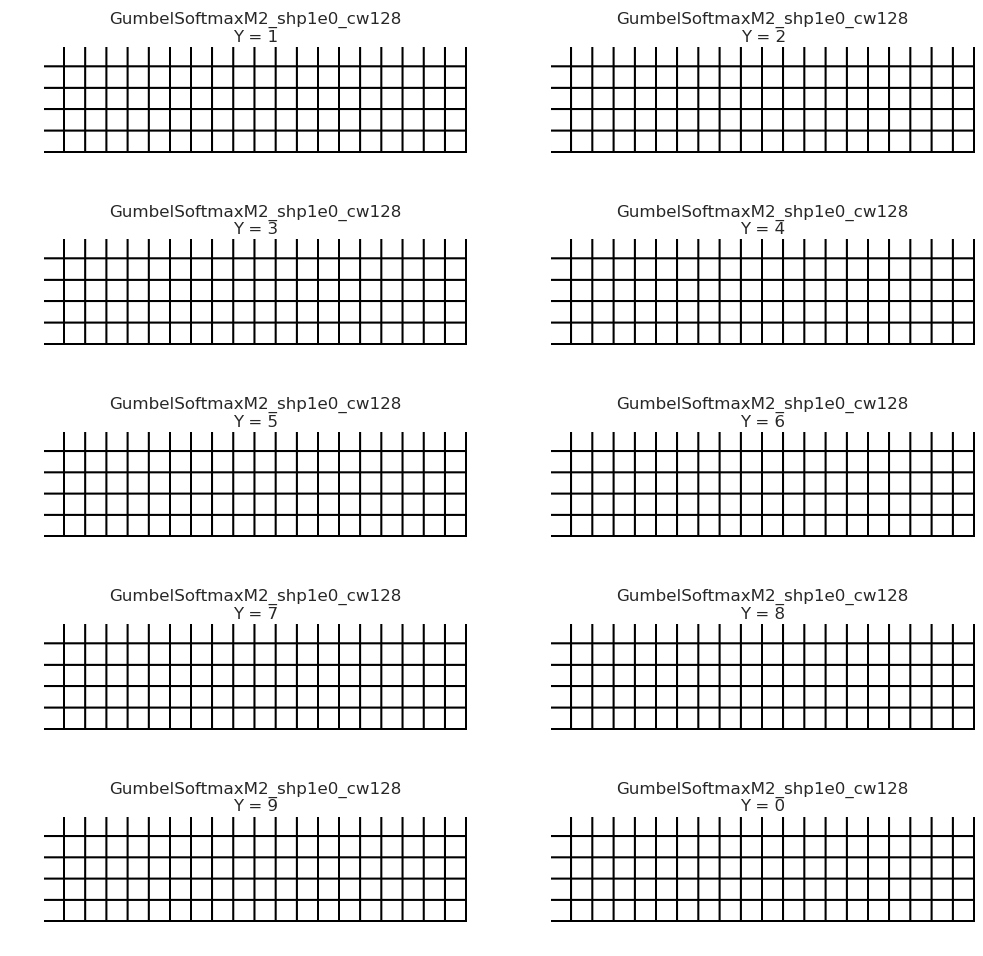

In [35]:
samples = loadHDF5(os.path.join(savedirs[modelkey],'samples.h5'))
samples.keys()
for k,v in samples.iteritems():
    if 'epochs' not in k:
        v = np.squeeze(v)
        samples[k] = v.reshape(v.shape[0],v.shape[1],28,28)
        print k, samples[k].shape
        
for k,v in samples.iteritems():
    if 'epochs' not in k:
        v = np.squeeze(v)
        #print v.shape
        samples[k] = v.reshape(v.shape[0],v.shape[1],28,28)
        #dirichletL = dirichletL.reshape(11,100,28,28)
        #print samples[k].shape

for k,v in samples.iteritems():
    if 'onehot' in k:
        n = v.shape[0]
        samples[k] = np.concatenate([v[:,100*i:100*(i+1):,:].reshape(n,1,100,28,28) for i in range(10)],axis=1)
        print k,samples[k].shape
        
def todisplayimage(x,rows=10,sep=3):
    n,m1,m2 = x.shape
    cols = int(np.ceil(n/float(rows)))
    #print rows,cols
    y = np.zeros((rows*(m1+sep),cols*(m2+sep)))
    c=0
    for i in range(n):
        r = i % rows
        c = int(np.floor(i/rows))
        #print r*(m1+sep),r*(m1+sep)+m1,c*(m2+sep),c*(m2+sep)+m2,y.shape
        y[r*(m1+sep):r*(m1+sep)+m1,c*(m2+sep):c*(m2+sep)+m2] = x[i]
    return y
        
plt.figure(1,figsize=(12,12))
for i in range(10):
    plt.subplot(5,2,i)
    out = todisplayimage(samples['onehotL'][-1,i],rows=5)
    plt.imshow(1-out)
    plt.gca().grid(False)
    plt.title('%s\nY = %s' % (modelkey,i))
    plt.axis('off')
    #plt.show()

# Z2 mu's

In [42]:
sorted(train.keys())

[u'KL_L',
 u'KL_U',
 u'KL_Y_U',
 u'KL_Z_L',
 u'KL_Z_U',
 u'L-q_Z_0_BN_running_mean',
 u'L-q_Z_0_BN_running_var',
 u'L-q_Z_1_BN_running_mean',
 u'L-q_Z_1_BN_running_var',
 u'L-q_h(x)_0_BN_running_mean',
 u'L-q_h(x)_0_BN_running_var',
 u'L-q_h(x)_1_BN_running_mean',
 u'L-q_h(x)_1_BN_running_var',
 u'L-q_h(x)_2_BN_running_mean',
 u'L-q_h(x)_2_BN_running_var',
 u'L-q_h(x)_3_BN_running_mean',
 u'L-q_h(x)_3_BN_running_var',
 u'L-q_logbeta_0_BN_running_mean',
 u'L-q_logbeta_0_BN_running_var',
 u'L-q_logbeta_1_BN_running_mean',
 u'L-q_logbeta_1_BN_running_var',
 u'NLL_L',
 u'NLL_U',
 u'U-q_Z_0_BN_running_mean',
 u'U-q_Z_0_BN_running_var',
 u'U-q_Z_1_BN_running_mean',
 u'U-q_Z_1_BN_running_var',
 u'U-q_h(x)_0_BN_running_mean',
 u'U-q_h(x)_0_BN_running_var',
 u'U-q_h(x)_1_BN_running_mean',
 u'U-q_h(x)_1_BN_running_var',
 u'U-q_h(x)_2_BN_running_mean',
 u'U-q_h(x)_2_BN_running_var',
 u'U-q_h(x)_3_BN_running_mean',
 u'U-q_h(x)_3_BN_running_var',
 u'U-q_logbeta_0_BN_running_mean',
 u'U-q_logbeta_0_

/misc/linux/rhel6/x86_64/local/pkg/python/2.7.3/lib/python2.7/site-packages/ipykernel/__main__.py:10: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
/usr/local/pkg/python/2.7/lib/python2.7/site-packages/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


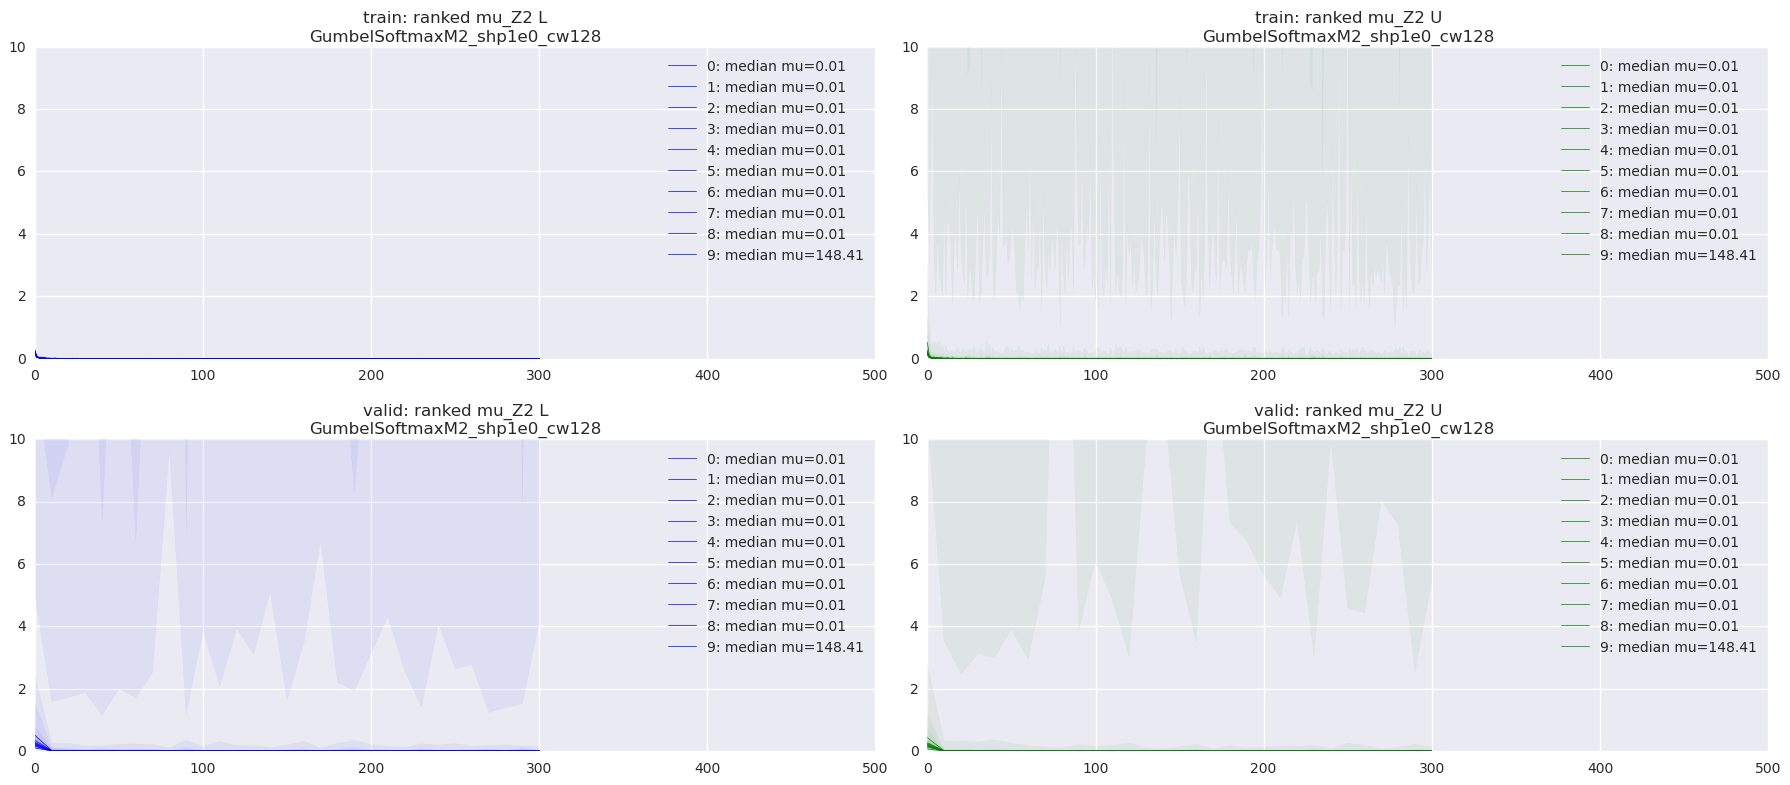

In [43]:

plt.figure(1,figsize=(18,8))
plt.subplot(2,2,1)
sortedL = np.sort(np.exp(train['logbeta_L']),axis=1)
for k in range(10):
    vals = reshape(sortedL)[:,:,k]
    plotPercentiles(vals,label='%s: median mu=%0.2f'%(k,np.percentile(vals[-1,:],50)),alpha=0.05,linewidth=0.5)
#plt.yscale('log')
plt.xlim(0,500)
plt.ylim(0,10)
plt.title('train: ranked mu_Z2 L\n%s' % modelkey)
plt.legend()

plt.subplot(2,2,2)
sortedU = np.sort(np.exp(train['logbeta_U']),axis=1)
for k in range(10):
    vals = reshape(sortedU)[:,:,k]
    plotPercentiles(vals,label='%s: median mu=%0.2f'%(k,np.percentile(vals[-1,:],50)),color='g',alpha=0.05,linewidth=0.5)
#plt.yscale('log')
plt.xlim(0,500)
plt.ylim(0,10)
plt.title('train: ranked mu_Z2 U\n%s' % modelkey)
plt.legend()

plt.subplot(2,2,3)
sortedL = np.sort(np.exp(valid['logbeta_L']),axis=1)
for k in range(10):
    vals = reshape(sortedL)[:,:,k]
    plotPercentiles(valid['epochs'],vals,label='%s: median mu=%0.2f'%(k,np.percentile(vals[-1,:],50)),color='b',alpha=0.05,linewidth=0.5)
#plt.yscale('log')
plt.xlim(0,500)
plt.ylim(0,10)
plt.title('valid: ranked mu_Z2 L\n%s' % modelkey)
plt.legend()

plt.subplot(2,2,4)
sortedU = np.sort(np.exp(valid['logbeta_U']),axis=1)
for k in range(10):
    vals = reshape(sortedU)[:,:,k]
    plotPercentiles(valid['epochs'],vals,label='%s: median mu=%0.2f'%(k,np.percentile(vals[-1,:],50)),color='g',alpha=0.05,linewidth=0.5)
#plt.yscale('log')
plt.xlim(0,500)
plt.ylim(0,10)
plt.title('valid: ranked mu_Z2 U\n%s' % modelkey)
plt.legend()
plt.tight_layout()


# q(y*|x)

In [52]:
def plotqyx(epochs,logbeta,y,color='b'):
    logbeta = reshape(logbeta)
    alpha = np.exp(logbeta)/np.exp(logbeta).sum(axis=2,keepdims=True)
    alpha_y = np.sum(alpha*y,axis=-1)
    plotPercentiles(alpha_y,label='alpha_y: mean=%0.2f' % alpha_y[:,-1].mean(),color='r',alpha=0.05)
    alpha_ny = alpha*(1-y)
    alpha_sorted = np.sort(alpha,axis=-1)[:,:,:-1]
    for k in range(alpha_sorted.shape[-1]):
        vals = alpha_sorted[:,:,k]
        plotPercentiles(epochs,vals,label='%s: mean alpha=%0.2f'%(k,np.mean(vals[:,-1])),color='b',alpha=0.05,linewidth=0.5)
    #plt.yscale('log')
    plt.xlim(0,500)
    plt.ylim(0,1)
    plt.legend()
    plt.xlabel('epochs')

/misc/linux/rhel6/x86_64/local/pkg/python/2.7.3/lib/python2.7/site-packages/ipykernel/__main__.py:10: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


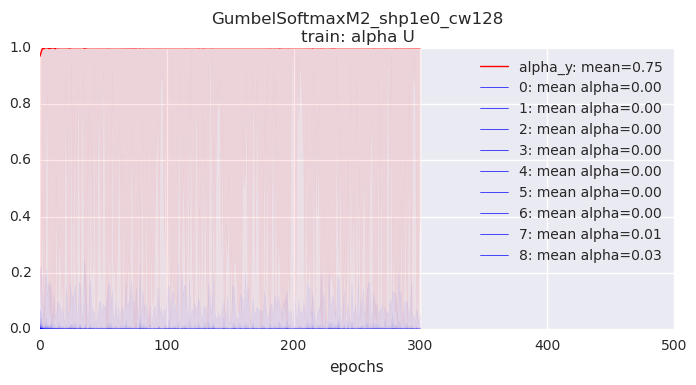

In [57]:
plt.figure(1,figsize=(18,8))
plt.subplot(2,2,1)
plotqyx(train['epochs'],train['logbeta_U'],y=(np.expand_dims(train['YU'],axis=-1) == np.arange(10).reshape(1,1,-1)).astype('float'))
plt.title('%s\ntrain: alpha U' % (modelkey))

In [58]:
sorted(train.keys())

[u'KL_L',
 u'KL_U',
 u'KL_Y_U',
 u'KL_Z_L',
 u'KL_Z_U',
 u'L-q_Z_0_BN_running_mean',
 u'L-q_Z_0_BN_running_var',
 u'L-q_Z_1_BN_running_mean',
 u'L-q_Z_1_BN_running_var',
 u'L-q_h(x)_0_BN_running_mean',
 u'L-q_h(x)_0_BN_running_var',
 u'L-q_h(x)_1_BN_running_mean',
 u'L-q_h(x)_1_BN_running_var',
 u'L-q_h(x)_2_BN_running_mean',
 u'L-q_h(x)_2_BN_running_var',
 u'L-q_h(x)_3_BN_running_mean',
 u'L-q_h(x)_3_BN_running_var',
 u'L-q_logbeta_0_BN_running_mean',
 u'L-q_logbeta_0_BN_running_var',
 u'L-q_logbeta_1_BN_running_mean',
 u'L-q_logbeta_1_BN_running_var',
 u'NLL_L',
 u'NLL_U',
 u'U-q_Z_0_BN_running_mean',
 u'U-q_Z_0_BN_running_var',
 u'U-q_Z_1_BN_running_mean',
 u'U-q_Z_1_BN_running_var',
 u'U-q_h(x)_0_BN_running_mean',
 u'U-q_h(x)_0_BN_running_var',
 u'U-q_h(x)_1_BN_running_mean',
 u'U-q_h(x)_1_BN_running_var',
 u'U-q_h(x)_2_BN_running_mean',
 u'U-q_h(x)_2_BN_running_var',
 u'U-q_h(x)_3_BN_running_mean',
 u'U-q_h(x)_3_BN_running_var',
 u'U-q_logbeta_0_BN_running_mean',
 u'U-q_logbeta_0_

## Z2 and alpha

/misc/linux/rhel6/x86_64/local/pkg/python/2.7.3/lib/python2.7/site-packages/ipykernel/__main__.py:10: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


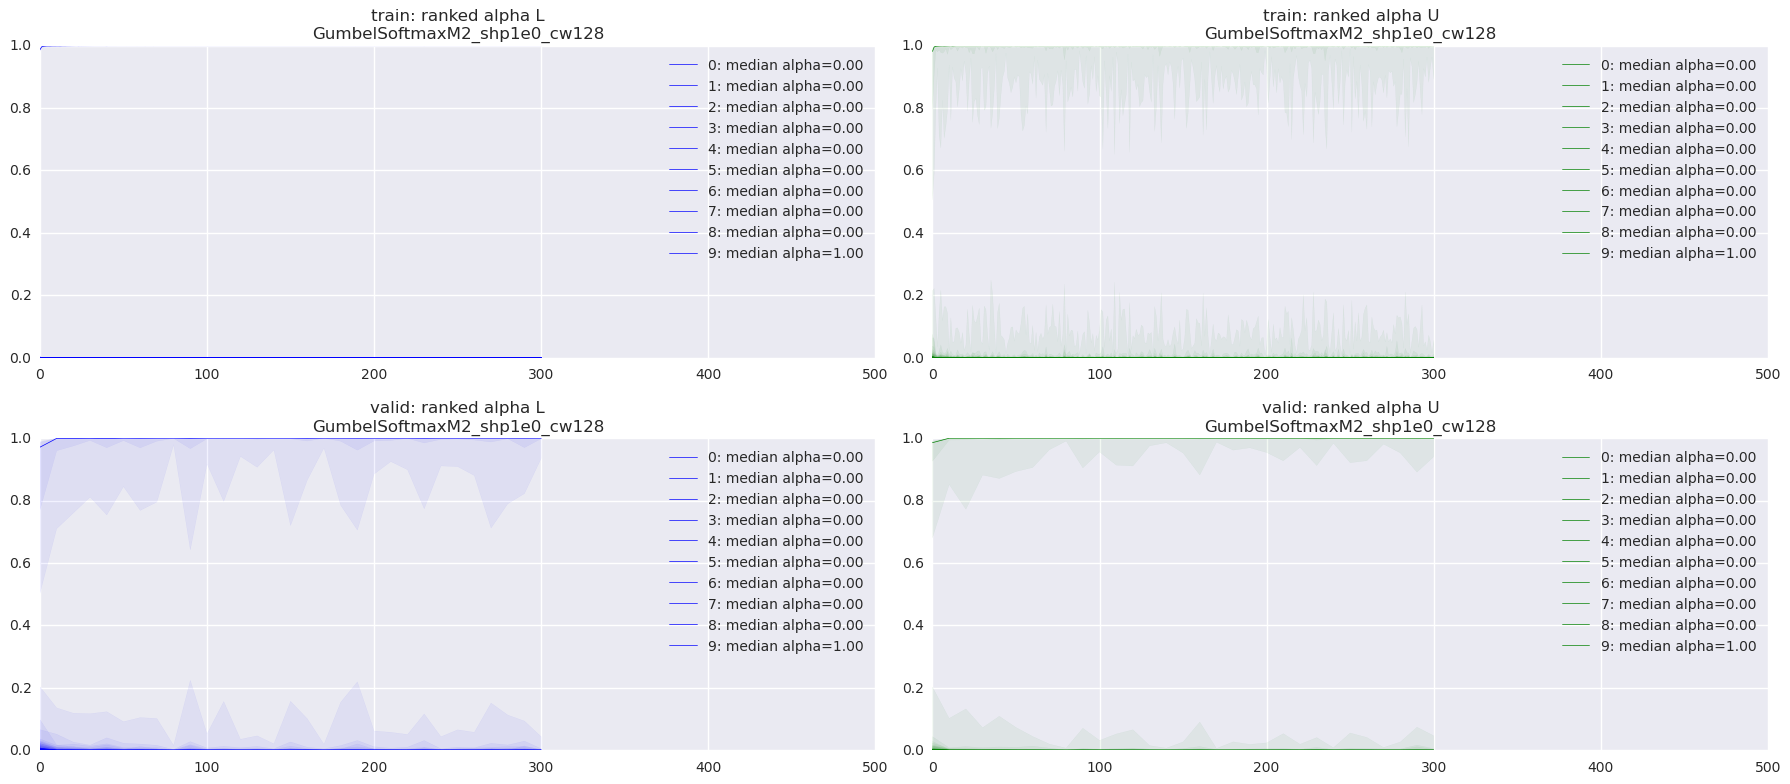

In [45]:
plt.figure(1,figsize=(18,8))

plt.subplot(2,2,1)
logbeta = reshape(train['logbeta_L'])
alpha = np.exp(logbeta)/np.exp(logbeta).sum(axis=2,keepdims=True)
alpha_sorted = np.sort(alpha,axis=2)
for k in range(10):
    vals = alpha_sorted[:,:,k]
    plotPercentiles(vals,label='%s: median alpha=%0.2f'%(k,np.percentile(vals[-1,:],50)),color='b',alpha=0.05,linewidth=0.5)
#plt.yscale('log')
plt.xlim(0,500)
plt.ylim(0,1)
plt.title('train: ranked alpha L\n%s' % modelkey)
plt.legend()

plt.subplot(2,2,2)
logbeta = reshape(train['logbeta_U'])
alpha = np.exp(logbeta)/np.exp(logbeta).sum(axis=2,keepdims=True)
alpha_sorted = np.sort(alpha,axis=2)
for k in range(10):
    vals = alpha_sorted[:,:,k]
    plotPercentiles(vals,label='%s: median alpha=%0.2f'%(k,np.percentile(vals[-1,:],50)),color='g',alpha=0.05,linewidth=0.5)
#plt.yscale('log')
plt.xlim(0,500)
plt.ylim(0,1)
plt.title('train: ranked alpha U\n%s' % modelkey)
plt.legend()

plt.subplot(2,2,3)
logbeta = reshape(valid['logbeta_L'])
alpha = np.exp(logbeta)/np.exp(logbeta).sum(axis=2,keepdims=True)
one_hot = np.zeros(alpha[np.isnan(alpha.sum(axis=2)),:].shape)
one_hot[:,-1] = 1
one_hot.shape
alpha[np.isnan(alpha.sum(axis=2)),:] = one_hot
alpha_sorted = np.sort(alpha,axis=2)
for k in range(10):
    vals = alpha_sorted[:,:,k]
    plotPercentiles(valid['epochs'],vals,label='%s: median alpha=%0.2f'%(k,np.percentile(vals[-1,:],50)),color='b',alpha=0.05,linewidth=0.5)
#plt.yscale('log')
plt.xlim(0,500)
plt.ylim(0,1)
plt.title('valid: ranked alpha L\n%s' % modelkey)
plt.legend()

plt.subplot(2,2,4)
logbeta = reshape(valid['logbeta_U'])
alpha = np.exp(logbeta)/np.exp(logbeta).sum(axis=2,keepdims=True)
one_hot = np.zeros(alpha[np.isnan(alpha.sum(axis=2)),:].shape)
one_hot[:,-1] = 1
one_hot.shape
alpha[np.isnan(alpha.sum(axis=2)),:] = one_hot
alpha_sorted = np.sort(alpha,axis=2)
for k in range(10):
    vals = alpha_sorted[:,:,k]
    plotPercentiles(valid['epochs'],vals,label='%s: median alpha=%0.2f'%(k,np.percentile(vals[-1,:],50)),color='g',alpha=0.05,linewidth=0.5)
#plt.yscale('log')
plt.xlim(0,500)
plt.ylim(0,1)
plt.title('valid: ranked alpha U\n%s' % modelkey)
plt.legend()

plt.tight_layout()

## Params

In [263]:
params = results[modelkey]['params']
params.keys()

In [264]:
q_alpha_hx_b = params['q_alpha_h(x)_b']
q_alpha_hx_b.shape

In [265]:
plotPercentiles(q_alpha_hx_b)

In [266]:
q_alpha_hx_W = params['q_alpha_h(x)_W']
q_alpha_hx_W.shape

In [267]:
wTw = []
for epoch in range(q_alpha_hx_W.shape[0]):
    wTw_epoch = []
    for i in range(9):
        for j in range(i+1,10):
            wi = q_alpha_hx_W[epoch,i]
            wj = q_alpha_hx_W[epoch,j]
            wTw_epoch.append(np.dot(wi,wj)/np.linalg.norm(wi)/np.linalg.norm(wj))
    wTw.append(wTw_epoch)
wTw = np.array(wTw)
plotPercentiles(params['epochs'],np.abs(wTw))
plt.title('distribution of cosine similarities between vectors\nin q_alpha_h(x)_W\n%s' % modelkey)
plt.xlabel('epochs')
plt.ylabel('|cosine|')

# Batchnorm running stats

(0, 5)

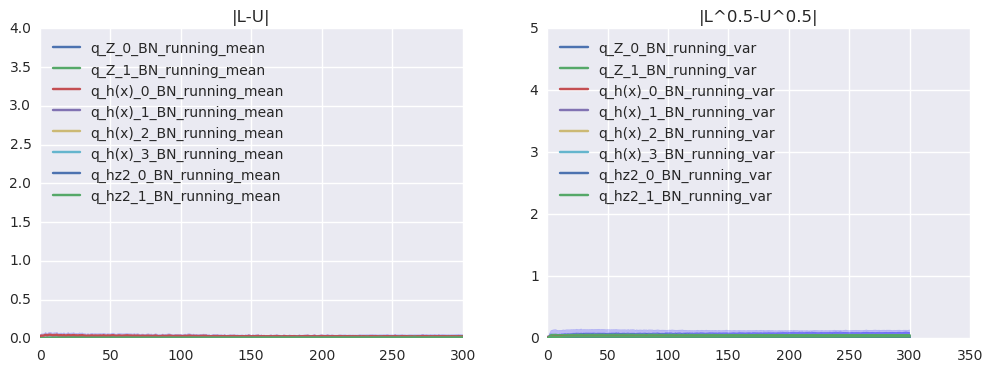

In [59]:
train_BNrunningstats = {k:v for k,v in train.iteritems() if 'running' in k}
prefixes = ['q(y|x)','L','U']
d = {p:{} for p in prefixes}
for k,v in train_BNrunningstats.iteritems():
    for p in prefixes:
        if k[:len(p)]==p:
            d[p][k[len(p)+1:]] = v
            
d2 = set(k for k in d[p].keys() for p in d.keys())
d2 = {k:{p:d[p][k] for p in d.keys() if k in d[p].keys()} for k in d2 }

plt.figure(1,figsize=(12,4))
plt.subplot(1,2,1)
#means
for k,v in sorted(d2.iteritems(),key=lambda x:x[0]):
    if 'mean' in k:
        U = v['U']
        L = v['L']
        diff = np.abs(L-U)
        avgdiff = diff.mean(axis=1)
        p10diff = np.percentile(diff,20,axis=1)
        p90diff = np.percentile(diff,80,axis=1)
        plt.plot(avgdiff,label=k)
        plt.fill_between(np.arange(len(avgdiff)),p10diff,p90diff,color='b',alpha=0.2)
plt.legend(loc='upper left')
plt.title('|L-U|')
plt.ylim(0,4)

plt.subplot(1,2,2)
#means
for k,v in sorted(d2.iteritems(),key=lambda x:x[0]):
    if 'var' in k:
        U = v['U']
        L = v['L']
        diff = np.abs(L**0.5-U**0.5)
        avgdiff = diff.mean(axis=1)
        p10diff = np.percentile(diff,10,axis=1)
        p90diff = np.percentile(diff,90,axis=1)
        plt.plot(avgdiff,label=k)
        plt.fill_between(np.arange(len(avgdiff)),p10diff,p90diff,color='b',alpha=0.2)
#plt.yscale('log')
plt.legend(loc='upper left')
plt.title('|L^0.5-U^0.5|')
plt.ylim(0,5)

## Z

In [268]:
muL = train['mu_L']
muU = train['mu_U']
print muU.shape

In [269]:
sorted_muL = muL[:,np.argsort(muL[-1])]
for i in range(muL.shape[1]):
    plt.plot(moving_average(sorted_muL[:,i],n=100),color='b',linewidth=0.1)

In [270]:
sorted_muU = muU[:,np.argsort(muU[-1])]
for i in range(muU.shape[1]):
    plt.plot(moving_average(sorted_muU[:,i],n=100),color='g',linewidth=0.1)

In [271]:
logcov2L = train['logcov2_L']
logcov2U = train['logcov2_U']
print logcov2U.shape
sigmaU = np.exp(0.5*logcov2U)
sigmaL = np.exp(0.5*logcov2L)

In [272]:
KL_U = 0.5*(np.exp(logcov2U)+muU**2.0-1.0-logcov2U)
KL_L = 0.5*(np.exp(logcov2L)+muL**2.0-1.0-logcov2L)

In [273]:
sorted_KL_U = np.sort(KL_U,axis=1)
for k in range(KL_U.shape[1]):
    vals = reshape(sorted_KL_U)[:,:,k]
    plotPercentiles(vals,color='g',alpha=0.05,linewidth=0.5)
#plt.xlim(0,500)
plt.ylim(0,9)
plt.title('KL(Z)_U')
plt.legend()
plt.show()

sorted_KL_L = np.sort(KL_L,axis=1)
for k in range(KL_L.shape[1]):
    vals = reshape(sorted_KL_L)[:,:,k]
    plotPercentiles(vals,color='b',alpha=0.05,linewidth=0.5)
#plt.xlim(0,500)
plt.ylim(0,9)
plt.title('KL(Z)_L')
plt.legend()
plt.show()


In [274]:
plt.figure(1,figsize=(16,6))

plt.subplot(1,2,1)
sorted_KL_U = KL_U[:,np.argsort(KL_U[-1])]
for i in range(KL_U.shape[1]):
    plt.plot(moving_average(sorted_KL_U[:,i],n=100),color='g',linewidth=0.5)
activeKL_U = np.sum(KL_U > 0.1,axis=1)
activeKL_U = moving_average(activeKL_U,n=100)
plt.plot(activeKL_U,color='k',label='# active KLs > 0.2')
plt.title('train KL(Z)_U')
plt.ylim(0,12)
plt.legend()

plt.subplot(1,2,2)
sorted_KL_L = KL_L[:,np.argsort(KL_L[-1])]
for i in range(KL_L.shape[1]):
    plt.plot(moving_average(sorted_KL_L[:,i],n=100),color='b',linewidth=0.5)
activeKL_L = np.sum(KL_L > 0.1,axis=1)
activeKL_L = moving_average(activeKL_L,n=100)
plt.plot(activeKL_L,color='k',label='# active KLs > 0.2')
plt.title('train KL(Z)_L')
plt.ylim(0,12)
plt.legend()

In [275]:
plt.figure(1,figsize=(16,6))

muL = valid['mu_L']
muU = valid['mu_U']
logcov2L = valid['logcov2_L']
logcov2U = valid['logcov2_U']
sigmaU = np.exp(0.5*logcov2U)
sigmaL = np.exp(0.5*logcov2L)
KL_U = 0.5*(np.exp(logcov2U)+muU**2.0-1.0-logcov2U)
KL_L = 0.5*(np.exp(logcov2L)+muL**2.0-1.0-logcov2L)

plt.subplot(1,2,1)
sorted_KL_U = KL_U[:,np.argsort(KL_U[-1])]
for i in range(KL_U.shape[1]):
    plt.plot(moving_average(sorted_KL_U[:,i],n=100),color='g',linewidth=0.5)
activeKL_U = np.sum(KL_U > 0.1,axis=1)
activeKL_U = moving_average(activeKL_U,n=10)
plt.plot(activeKL_U,color='k',label='# active KLs > 0.2')
plt.title('valid KL(Z)_U')
plt.ylim(0,12)
plt.legend()

plt.subplot(1,2,2)
sorted_KL_L = KL_L[:,np.argsort(KL_L[-1])]
for i in range(KL_L.shape[1]):
    plt.plot(moving_average(sorted_KL_L[:,i],n=100),color='b',linewidth=0.5)
activeKL_L = np.sum(KL_L > 0.1,axis=1)
activeKL_L = moving_average(activeKL_L,n=10)
plt.plot(activeKL_L,color='k',label='# active KLs > 0.2')
plt.title('valid KL(Z)_L')
plt.ylim(0,12)
plt.legend()